In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
def read_file(sn,tn):
    s = cv2.imread('/Users/stevenzhai/Desktop/EIE4512/color-transfer/source/'+sn+'.png')
    s = cv2.cvtColor(s,cv2.COLOR_BGR2LAB)
    t = cv2.imread('/Users/stevenzhai/Desktop/EIE4512/color-transfer/target/'+tn+'.png')
    t = cv2.cvtColor(t,cv2.COLOR_BGR2LAB)
    return s, t

In [5]:
def get_mean_and_std(x):
    x_mean, x_std = cv2.meanStdDev(x)
    x_mean = np.hstack(np.around(x_mean,2))
    x_std = np.hstack(np.around(x_std,2))
    return x_mean, x_std

In [6]:
def color_transfer():
    sources = ['s1','s2']
    targets = ['t1','t2']

    for n in range(len(sources)):
        print("Converting picture"+str(n+1)+"...ing")
        s, t = read_file(sources[n],targets[n])
        s_mean, s_std = get_mean_and_std(s)
        t_mean, t_std = get_mean_and_std(t)

        height, width, channel = s.shape
        for i in range(0,height):
            for j in range(0,width):
                for k in range(0,channel):
                    x = s[i,j,k]
                    x = ((x-s_mean[k])*(t_std[k]/s_std[k]))+t_mean[k]
                    # round or +0.5
                    x = round(x)
                    # boundary check
                    x = 0 if x<0 else x
                    x = 255 if x>255 else x
                    s[i,j,k] = x

        s = cv2.cvtColor(s,cv2.COLOR_LAB2BGR)
        cv2.imwrite('/Users/stevenzhai/Desktop/EIE4512/color-transfer/result/r'+str(n+1)+'.png',s)

In [5]:
color_transfer()
os.system("pause")

Converting picture1...ing
Converting picture2...ing


32512

In [12]:
img = cv2.imread('/Users/stevenzhai/Desktop/EIE4512/color-transfer/source/s1.png')

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Load the cascade
face_cascade = cv2.CascadeClassifier('/Users/stevenzhai/Desktop/EIE4512/haarcascade_frontalface_alt2.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray,1.1,4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 2)
    faces = img[y:y + h, x:x + w]
    cv2.imshow("/Users/stevenzhai/Desktop/EIE4512/color-transfer/face",faces)
    cv2.imwrite('/Users/stevenzhai/Desktop/EIE4512/color-transfer/face.jpg', faces)
      
# Display the output
cv2.imwrite('/Users/stevenzhai/Desktop/EIE4512/color-transfer/detcted.jpg', img)
cv2.imshow('/Users/stevenzhai/Desktop/EIE4512/color-transfer/img', img)
cv2.waitKey(0)

27

In [63]:
face_img = cv2.imread('/Users/stevenzhai/Desktop/EIE4512/color-transfer/face.jpg')
face_img = cv2.cvtColor(face_img,cv2.COLOR_BGR2LAB)
land_img = cv2.imread('/Users/stevenzhai/Desktop/EIE4512/color-transfer/target/t2.png')
land_img = cv2.cvtColor(land_img,cv2.COLOR_BGR2LAB)
face_l,face_w,face_c = face_img.shape
land_l,land_w,land_c = land_img.shape

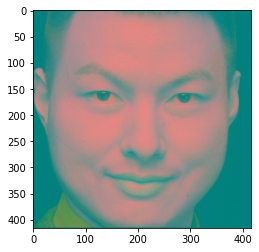

In [64]:
plt.imshow(face_img)

In [65]:
face_l,face_w,face_c = face_img.shape
land_l,land_w,land_c = land_img.shape

In [66]:
def patch_color_transfer(size):
    flag_1 = 0
    flag_2 = 0
    while flag_1 < size:
        while flag_2 < size:
            face_img_temp = face_img[face_l//size*flag_1:face_l//size*(flag_1+1),face_w//size*flag_2:face_w//size*(flag_2+1)]
            land_img_temp = land_img[land_l//size*flag_1:land_l//size*(flag_1+1),land_w//size*flag_2:land_w//size*(flag_2+1)]
        
            face_mean,face_std = get_mean_and_std(face_img_temp)
            land_mean,land_std = get_mean_and_std(land_img_temp)
        
            for i in range(0,face_l//size):
                for j in range(0,face_w//size):
                    for k in range(0,face_c):
                        x = face_img_temp[i,j,k]
                        x = ((x-face_mean[k])*(land_std[k]/face_std[k]))+land_mean[k]
                        # round or +0.5
                        x = round(x)
                        # boundary check
                        x = 0 if x<0 else x
                        x = 255 if x>255 else x
                        face_img[i + face_l//size*flag_1,j + face_l//size*flag_2,k] = x
                    
            flag_2 += 1
        flag_2 = 0
        flag_1 += 1

In [67]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv2.LUT(src, table)

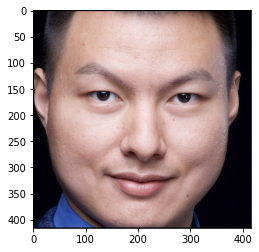

In [68]:
face_ori = cv2.imread('/Users/stevenzhai/Desktop/EIE4512/color-transfer/face.jpg')
face_ori = cv2.cvtColor(face_ori,cv2.COLOR_BGR2RGB)
plt.imshow(face_ori)

In [69]:
patch_color_transfer(10)

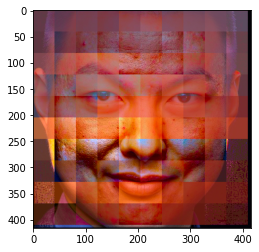

In [70]:
face_img = cv2.cvtColor(face_img,cv2.COLOR_LAB2RGB)
plt.imshow(face_img)

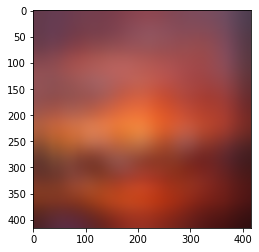

In [71]:
avging = cv2.blur(face_img,(50,50))
avging = cv2.blur(avging,(50,50))
plt.imshow(avging)

In [72]:
target = gammaCorrection(avging,1.5)
target = cv2.cvtColor(target,cv2.COLOR_RGB2LAB)
face_ori2 = cv2.cvtColor(face_ori,cv2.COLOR_RGB2LAB)
source_l,source_w,source_c = face_ori2.shape
target_l,target_w,target_c = target.shape

In [73]:
target = avging.copy()
target = cv2.cvtColor(target,cv2.COLOR_RGB2LAB)
face_ori2 = cv2.cvtColor(face_ori,cv2.COLOR_RGB2LAB)

In [50]:
def calculate_cdf(histogram):
    """
    This method calculates the cumulative distribution function
    :param array histogram: The values of the histogram
    :return: normalized_cdf: The normalized cumulative distribution function
    :rtype: array
    """
    # Get the cumulative sum of the elements
    cdf = histogram.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf

In [51]:
def calculate_lookup(src_cdf, ref_cdf):
    """
    This method creates the lookup table
    :param array src_cdf: The cdf for the source image
    :param array ref_cdf: The cdf for the reference image
    :return: lookup_table: The lookup table
    :rtype: array
    """
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

In [52]:
def match_histograms(src_image, ref_image):
    """
    This method matches the source image histogram to the
    reference signal
    :param image src_image: The original source image
    :param image  ref_image: The reference image
    :return: image_after_matching
    :rtype: image (array)
    """
    # Split the images into the different color channels
    # b means blue, g means green and r means red
    src_b, src_g, src_r = cv2.split(src_image)
    ref_b, ref_g, ref_r = cv2.split(ref_image)
 
    # Compute the b, g, and r histograms separately
    # The flatten() Numpy method returns a copy of the array c
    # collapsed into one dimension.
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    # Compute the normalized cdf for the source and reference image
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    # Make a separate lookup table for each color
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # Use the lookup function to transform the colors of the original
    # source image
    blue_after_transform = cv2.LUT(src_b, blue_lookup_table)
    green_after_transform = cv2.LUT(src_g, green_lookup_table)
    red_after_transform = cv2.LUT(src_r, red_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([
        blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching

In [82]:
tmp = gammaCorrection(avging,1.8)

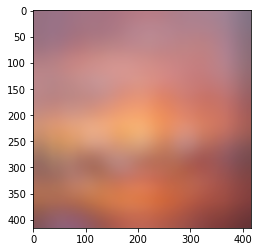

In [83]:
plt.imshow(tmp)

In [84]:
midgard = match_histograms(face_ori,tmp)

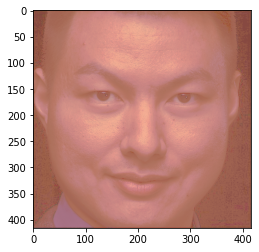

In [85]:
plt.imshow(midgard)

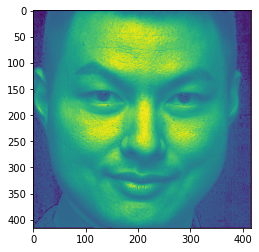

In [86]:
plt.imshow(midgard[:,:,0])

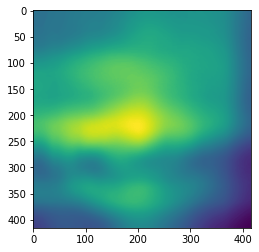

In [87]:
plt.imshow(L)

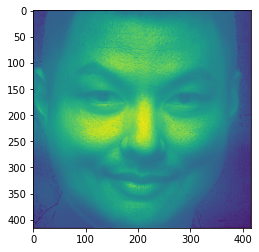

In [88]:
plt.imshow(Asgard[:,:,0])

In [89]:
midgard = cv2.cvtColor(midgard,cv2.COLOR_RGB2LAB)

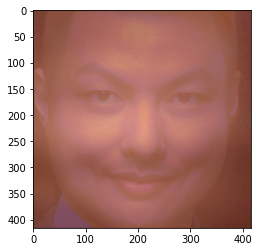

In [90]:
L,A,B = cv2.split(target)
midgard[:,:,0] = np.round((L + 0.9*midgard[:,:,0])/1.9)
Asgard = cv2.cvtColor(midgard,cv2.COLOR_LAB2RGB)
plt.imshow(Asgard)